In [16]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import cohlib.confs.utils as confutils
from cohlib.utils import pickle_open, add0, naive_estimator

In [33]:
def get_ests(seed, gseed=0):
    latent_path = f'/projectnb/stephenlab/jtauber/cohlib/experiments/data/latent-basic_single_log_rank1/window1000/gseed{gseed}/K3/L100/lseed{seed}/latent_sim.pkl'
    latent_load = pickle_open(latent_path)

    lcfg = confutils.omega(latent_load['lcfg'])
    nz = latent_load['nz']
    zs_nz = latent_load['zs_nz']
    freqs = latent_load['freqs']
    num_freqs = freqs.size
    delta = 1e-3
    zs = jnp.zeros((num_freqs, lcfg.K, lcfg.L), dtype=complex)
    zs = zs.at[nz,:,:].set(zs_nz)
    zs_0dc = jnp.apply_along_axis(add0, 0, zs)
    xs = jnp.fft.irfft(zs_0dc, axis=0)

    lams_ests = {}
    ns_ests = {}
    # mus = [-2.0, -1.0, 0.0, 2.0]
    mus = [-2.0, -1.0, 0.0, 2.0]
    for mu in mus:
        obs_path = f'/projectnb/stephenlab/jtauber/cohlib/experiments/data/latent-basic_single_log_rank1/window1000/gseed{gseed}/K3/L100/lseed{seed}/obs-pp_log/mu{mu}/oseed{seed}/obs_sim.pkl'
        obs_load = pickle_open(obs_path)

        lams = jnp.exp(mu + xs)
        ns = obs_load['obs']

        lams_ests[mu] = naive_estimator(lams, nonzero_inds=nz) 
        ns_ests[mu] = naive_estimator(ns, nonzero_inds=nz) * (1/delta)**2
    return lams_ests, ns_ests

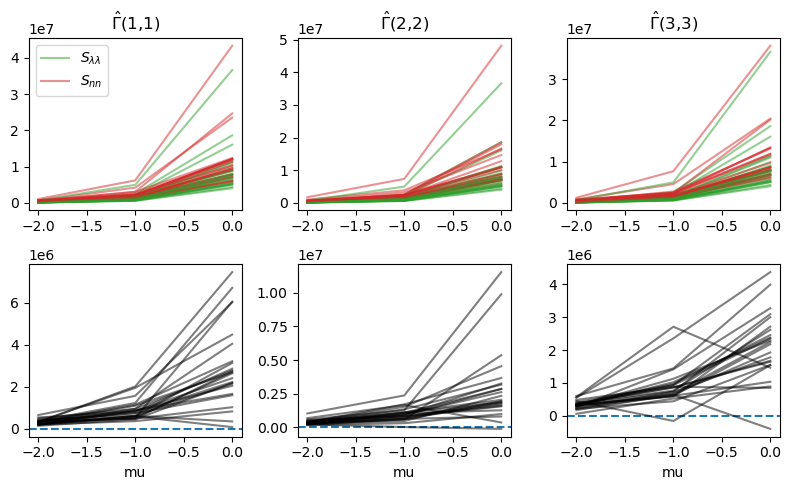

In [52]:
mus = [-2.0, -1.0, 0.0]
fig, ax = plt.subplots(2,3, figsize=(8,5), sharey=False)
for seed in range(24):
    lams_ests, ns_ests = get_ests(seed)
    j = 0
    for i in range(3):
        lams_ii = jnp.array([lams_ests[mu][j,i,i] for mu in mus])
        ns_ii = jnp.array([ns_ests[mu][j,i,i] for mu in mus])
        ax[0,i].plot(mus, lams_ii.real, color='tab:green', alpha=0.5, label='$S_{\lambda \lambda}$')
        ax[0,i].plot(mus, ns_ii.real, color='tab:red', alpha=0.5, label='$S_{n n}$')
        ax[1,i].plot(mus, ns_ii.real - lams_ii.real, color='k', alpha=0.5)

        if seed == 0 and i == 0:
            labels = ['$S_{\lambda \lambda}$', '$S_{n n}$']
            ax[0,i].legend(labels)
        if seed == 0:
            ax[1,i].set_xlabel('mu')
            ax[1,i].axhline(0, linestyle='--')
            ax[0,i].set_title(r'$\hat{\Gamma}$' + f'({i+1},{i+1})')
plt.tight_layout()
        

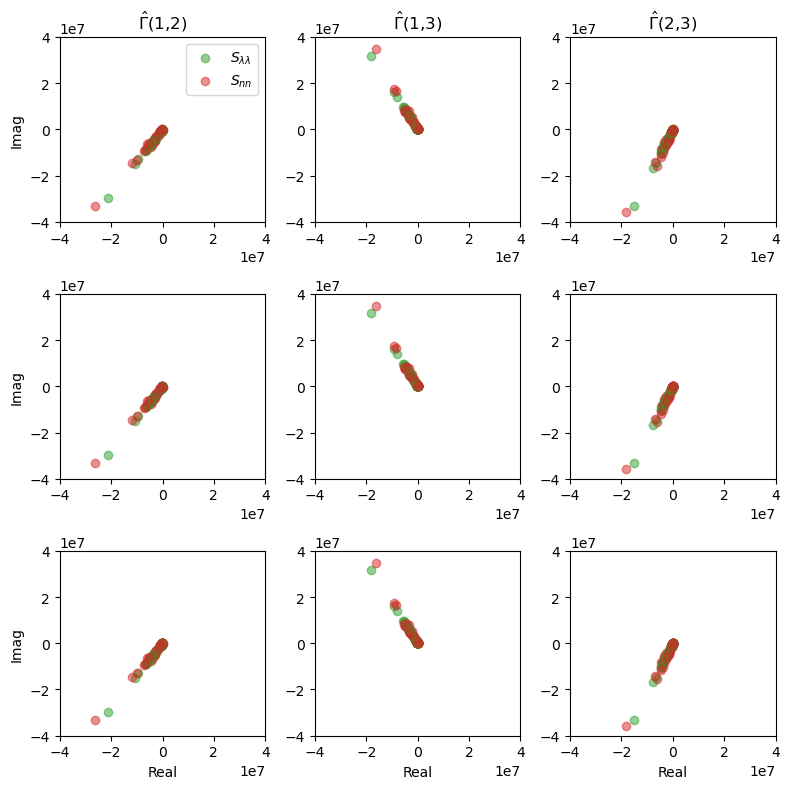

In [54]:
mus = [-2.0, -1.0, 0.0]
fig, ax = plt.subplots(3,3, figsize=(8,8))
for seed in range(24):
    lams_ests, ns_ests = get_ests(seed)
    j = 0
    pairs = [(0,1), (0,2), (1, 2)]
    for h, mu in enumerate(mus):
        for i, pair in enumerate(pairs):
            m = pair[0]
            n = pair[1]
            lams_mn = jnp.array([lams_ests[mu][j,m,n] for mu in mus])
            ns_mn = jnp.array([ns_ests[mu][j,m,n] for mu in mus])

            ax[h,i].scatter(lams_mn.real, lams_mn.imag, color='tab:green', alpha=0.5)
            ax[h,i].scatter(ns_mn.real, ns_mn.imag, color='tab:red', alpha=0.5)
            ax[h,i].set_xlim([-4e7, 4e7])
            ax[h,i].set_ylim([-4e7, 4e7])

            # if seed == 0: 
                # ax[h,i].axhline(0, linestyle='--')
            if seed == 0 and h == 0:
                if i == 0:
                    labels = ['$S_{\lambda \lambda}$', '$S_{n n}$']
                    ax[h,i].legend(labels)
                ax[h,i].set_title(r'$\hat{\Gamma}$' + f'({m+1},{n+1})')
                ax[h,i].set_title(r'$\hat{\Gamma}$' + f'({m+1},{n+1})')
            if seed == 0 and h == 2:
                ax[h, i].set_xlabel('Real')
            if seed == 0 and i == 0:
                ax[h, i].set_ylabel('Imag')

plt.tight_layout()
        

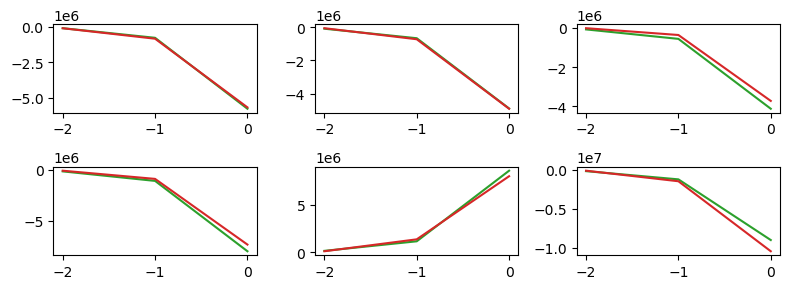

In [57]:
j = 0
lams_ests
fig, ax = plt.subplots(2,3, figsize=(8,3))
pairs = [(0,1), (0,2), (1, 2)]
for i, pair in enumerate(pairs):
    m = pair[0]
    n = pair[1]
    lams_mn = jnp.array([lams_ests[mu][j,m,n] for mu in mus])
    ns_mn = jnp.array([ns_ests[mu][j,m,n] for mu in mus])

    ax[0,i].plot(mus, lams_mn.real, color='tab:green')
    ax[0,i].plot(mus, ns_mn.real, color='tab:red')
    ax[1,i].plot(mus, lams_mn.imag, color='tab:green')
    ax[1,i].plot(mus, ns_mn.imag, color='tab:red')
plt.tight_layout()
    

In [47]:
ns_ests[2.0]

Array([[[ 5.4927898e+08-9.0339087e-02j, -3.1584090e+08-4.5197059e+08j,
         -2.7211280e+08+4.5823370e+08j],
        [-3.1584090e+08+4.5197062e+08j,  5.8693939e+08-2.0767310e+00j,
         -2.2850003e+08-5.0256358e+08j],
        [-2.7211280e+08-4.5823370e+08j, -2.2850003e+08+5.0256358e+08j,
          5.5090669e+08+1.0444458e+00j]]], dtype=complex64)